Tasks for today using python:

1. Using python, pull 1000 samples from the normal distribution represented by mean 42 and standard deviation 2.
2. Plot a histogram of the samples
3. From the data, calculate the mean and standard deviation explicitly (use equations found online)
4. Use the new mean and standard deviation you calculated in 3 to pull an additional 1000 samples.  Plot these on the same graph as 2 and overlap them to compare how the random pulls from the two distributions line up.

[44.66317301 43.43055795 38.90919942 41.9832323  43.24267195 40.55982888
 42.53102317 42.21709705 42.00858286 41.65079958 42.86605238 44.40607475
 40.06986866 44.05654816 42.45726026 42.89027523 39.72679558 42.27027376
 44.969074   39.84039023 38.04454344 38.51325541 42.53214033 46.76993466
 44.24738251 45.34524443 42.19829843 44.79599275 41.45750402 43.22640837
 41.46536562 40.90138197 42.26541659 41.04771597 44.61694616 42.39002656
 42.80041998 41.32473533 44.51294453 40.536061   43.3204631  41.29825622
 40.12113328 41.02132557 40.39081772 41.57460472 41.32171951 42.62433987
 43.13030534 41.70515948 41.94818933 42.57818841 40.92024186 43.41632004
 43.68444948 42.40716159 46.78940733 43.83491788 41.77545506 41.27563911
 41.53563549 40.9965422  44.25757031 40.60437994 41.83775563 40.94140784
 44.09236571 39.16288794 41.27500163 41.75618862 42.63871284 42.9218058
 41.56842022 43.97814491 42.62950756 46.93530211 38.98335703 43.24120133
 39.90973492 40.40398236 45.97016918 45.4896283  38.

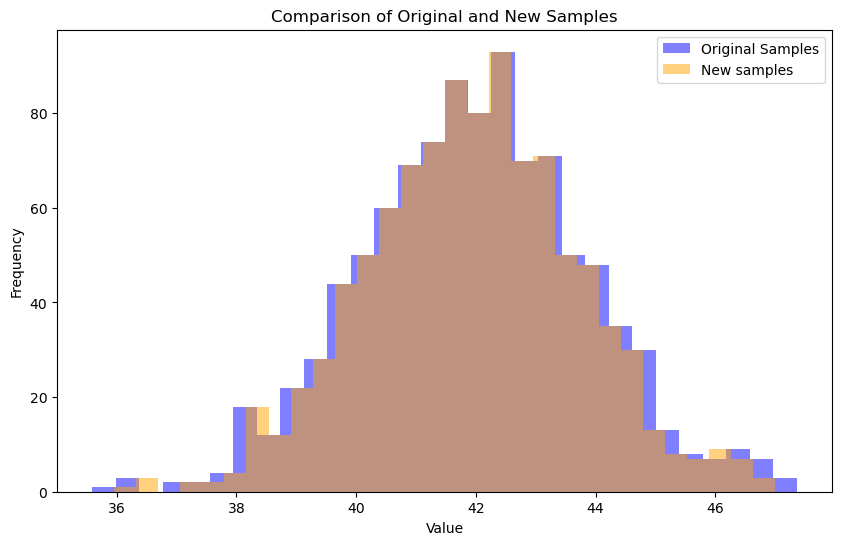

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import statistics 

np.random.seed(10)
x = np.random.normal(42, 2, 1000)   #pull 1000 samples from normal distribution represented by mean 42 and standard deviation 2.
print(x)

avg = np.sum(x) / len(x)
print(round(avg,15))
print(np.mean(x))

std = np.sqrt(np.sum((x - avg)**2/ (len(x))))
print(std)
print(np.std(x))

np.random.seed(10)
x_new = np.random.normal(avg, std, 1000)
plt.figure(figsize=(10, 6))
plt.hist(x, bins = 30, alpha = 0.5, label = 'Original Samples', color= 'blue')
plt.hist(x_new, bins = 30, alpha = 0.5, label = 'New samples', color= 'orange')
plt.title('Comparison of Original and New Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

Dor this one, you will get familiar with normal distribution and know how to calculate the mean and Standard deviation. and from the data you will recreate a new one from the mean and standard deviation to overlap the old one to see how it will go in the graph. And also, you will learn about Bayesian method. Beyesian bethod has advantage of easier and the data will be vary of 95% high density compare to frequentist. So, if we look through Frequentist perspective, I will say that my value at that point will be constant. But for bayesian, 95% of the value I got will be around that range, I can be this value or I can be that value as long as my value still in 95% high density interval.

41.97088672876907
52.95563387419381
Area under PDF 1 (mean=41.97088672876907, std=1.8759155143922779): 0.9998987641729211
Area under PDF 2 (mean=52.95563387419381, std=3.979096399680997): 0.9987613993087624


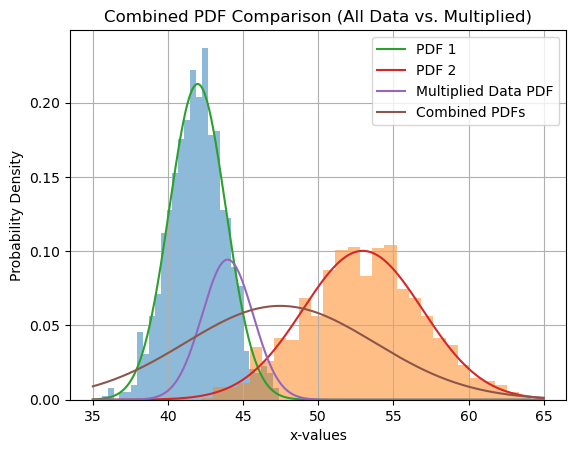

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(10)
x1 = np.random.normal(42, 2, 1000)
x2 = np.random.normal(53, 4, 1000)
mean1 = np.mean(x1)
mean2 = np.mean(x2)
std1 = np.std(x1)
std2 = np.std(x2)
print(mean1)
print(mean2) 

x_values1 = np.linspace(35 , 65 , 1000)
pdf_values1 = norm.pdf(x_values1, loc = mean1, scale = std1)
x_values2 = np.linspace(35 , 65 , 1000)
pdf_values2 = norm.pdf(x_values1, loc = mean2, scale = std2)
#Empirical Rule: The empirical rule (or the 68-95-99.7 rule) states that for a normal distribution, approximately:
# 68% of the data falls within 1 standard deviation of the mean (μ ± σ).
# 95% of the data falls within 2 standard deviations of the mean (μ ± 2σ).
# 99.7% of the data falls within 3 standard deviations of the mean (μ ± 3σ).

plt.hist(x1, density= True, bins = 30, alpha = 0.5)
plt.hist(x2, density= True, bins = 30, alpha = 0.5)
plt.plot(x_values1, pdf_values1, label = 'PDF 1')
plt.plot(x_values1, pdf_values2, label = 'PDF 2')


all_data = np.concatenate((x1, x2))
mean_all = np.mean(all_data)
std_all = np.std(all_data)

x_values_all = np.linspace(35, 65, 1000)
pdf_all = norm.pdf(x_values_all, loc=mean_all, scale=std_all)



# pdf_combined = np.zeros_like(pdf_values1)
# for i in range(len(pdf_values1)):
#   pdf_combined[i] = np.sum(norm.pdf(x_values1[i], loc = [mean1, mean2], scale =[std1, std2]))
  
#go through 1000 data point
#check if two x is the same and find out y value in that x values
#multiply all y values
pdf_combined = np.zeros_like(pdf_values1)
for i in range(len(pdf_values1)): 
  pdf_combined[i] = (pdf_values1[i] * pdf_values2[i]) * 100
pdf_combined = pdf_values1 * pdf_values2 * 100

def normal_pdf(x, mean, std):
  return (1 / (std * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std**2))

y_values1 = normal_pdf(x_values1, mean1, std1)
y_values2 = normal_pdf(x_values2, mean2, std2)
area1 = np.trapz(y_values1, x_values1)
area2 = np.trapz(y_values2, x_values2)
print(f"Area under PDF 1 (mean={mean1}, std={std1}):", area1)
print(f"Area under PDF 2 (mean={mean2}, std={std2}):", area2)

# Create the plot
plt.plot(x_values1, pdf_combined, label='Multiplied Data PDF')
plt.plot(x_values_all, pdf_all, label='Combined PDFs')
plt.xlabel('x-values')
plt.ylabel('Probability Density')
plt.title('Combined PDF Comparison (All Data vs. Multiplied)')
plt.legend()
plt.grid(True)
plt.show()

For this one, we also learn how to combine and multiply 2 PDf together. For the multiply part, let's visualize that every single point on two graph of x-values from min of first graph to max of second graph will be the same, then we get the y-values, multiply them together so that we can get a joint propability distribution. For the combined pdf, two independent continuouse random variable X and Y are added together. 

[ 0.50184393 -2.12977956  1.2654052 ]
[ 8.45679981e-01  1.25408231e+00  1.08839695e+00  2.27849539e-01
  1.50923008e+00  1.71490424e+00  8.46163662e-01  2.06950807e+00
  5.30297632e-01  1.18593173e+00  7.30461693e-01  1.19763096e+00
  1.12088614e+00  6.52612580e-01 -9.94343686e-02  8.74148959e-01
  7.13718938e-01  2.95741026e-02  1.15294370e+00  8.89897871e-01
  1.73093288e+00  1.29028504e+00  6.45990094e-01  1.21301594e+00
 -4.69557660e-01  7.08838939e-01  9.68395776e-01  7.83883032e-01
  1.26744706e+00  7.12483015e-01 -3.31148713e-03  4.29547631e-02
  1.60885918e+00  1.35971466e+00  1.91717091e-01  1.36623575e+00
  3.27630334e-01  4.74928517e-01  1.09360640e+00 -1.32359680e-02
  3.81305552e-01  2.19122559e-01  1.15506269e+00  1.61811537e+00
 -8.50923746e-02  1.08714059e+00  8.33105982e-01 -1.88699448e-01
  1.02948606e+00  1.88743542e-01  2.47331831e-01  1.02253165e+00
  1.97880041e+00  9.19940153e-01  6.22864535e-01  7.30768435e-01
 -6.25662859e-01  2.11814296e-01 -6.29231885e-01  8.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


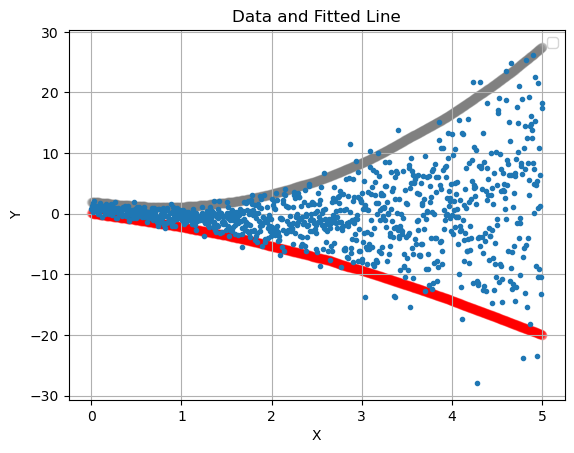

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

np.random.seed(10)
x = np.linspace(0, 5, 1000)
y = 0.5*x**2 - 2 * x + 1
y_noise = y + np.random.normal(0, 3, len(x))

matrix = np.vstack([x**2, x, np.ones(len(x))]).T

beta_scipy, residual, rank, s = linalg.lstsq(matrix, y_noise)
print(beta_scipy)
mean = np.mean(y_noise)

np.random.seed(15)
X = np.linspace(0, 5, 1000)
a = np.random.normal(0.5, 0.5, 1000)
b = np.random.normal(-2, 0.5, 1000)
c = np.random.normal(1, 0.5, 1000)

Y = a*X**2 + b*X + c

print(Y)
# Plot the data with noise
# plt.plot(x, y_noise, 'x', label='Data with Noise')

# Plot the fitted line using the estimated parameters
plt.plot(X, Y, '.')
bound1 = []

for i in range(len(X)): 
    y_values = a * X[i] **2 + b* X[i] + c
    bound1.append(y_values)
    # print(np.percentile(y_values, 2.5))
    plt.scatter(X[i],np.percentile(y_values, 2.5), color = 'red', alpha = 0.2)
    plt.scatter(X[i],np.percentile(y_values, 97.5), color = 'gray', alpha = 0.2)



# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data and Fitted Line')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()



for this part, you learn how to work with data from the normal distribution and also, how to plot 95% high density in the graph. There are some new method that you can use for easier calculation such as np.percentile(), also becareful with the percentage in the method because you will mess with it a lot, look at the data and where is the percentage rely on?. Or where is 0% is y at, because you may mistake y is at 0 when percentage is 0%.